In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [65]:
walk_v = pd.read_csv('../Raw_data/walk_vera.csv')
walk_s = pd.read_csv('../Raw_data/15min_sam.csv')
walk_k = pd.read_csv('../Raw_data/walk_kevin.csv')

In [66]:
#walk_v = walk_s.iloc[int(0.50*len(walk_v)):int(0.70*len(walk_v))].reset_index()
walk_s = walk_s.iloc[int(0.50*len(walk_s)):int(0.58*len(walk_s))].reset_index()
walk_k = walk_k.iloc[int(0.10*len(walk_k)):int(0.40*len(walk_k))].reset_index()

In [67]:
print(len(walk_v))
print(len(walk_s))
print(len(walk_k))

71184
72014
46232


In [68]:
# Butterworth filter vera
b, a = signal.butter(5, 0.06, btype='lowpass', analog=False)
low_passed_v_x = signal.filtfilt(b, a, walk_v['gFx'])
low_passed_v_y = signal.filtfilt(b, a, walk_v['gFy'])
low_passed_v_z = signal.filtfilt(b, a, walk_v['gFz'])

In [69]:
# Butterworth filter sam
b, a = signal.butter(1, 0.04, btype='lowpass', analog=False)
low_passed_s_x = signal.filtfilt(b, a, walk_s['gFx'])
low_passed_s_y = signal.filtfilt(b, a, walk_s['gFy'])
low_passed_s_z = signal.filtfilt(b, a, walk_s['gFz'])

In [70]:
# Butterworth filter kevin
b, a = signal.butter(4, 0.06, btype='lowpass', analog=False)
low_passed_k_x = signal.filtfilt(b, a, walk_k['gFx'])
low_passed_k_y = signal.filtfilt(b, a, walk_k['gFy'])
low_passed_k_z = signal.filtfilt(b, a, walk_k['gFz'])

<function matplotlib.pyplot.show(*args, **kw)>

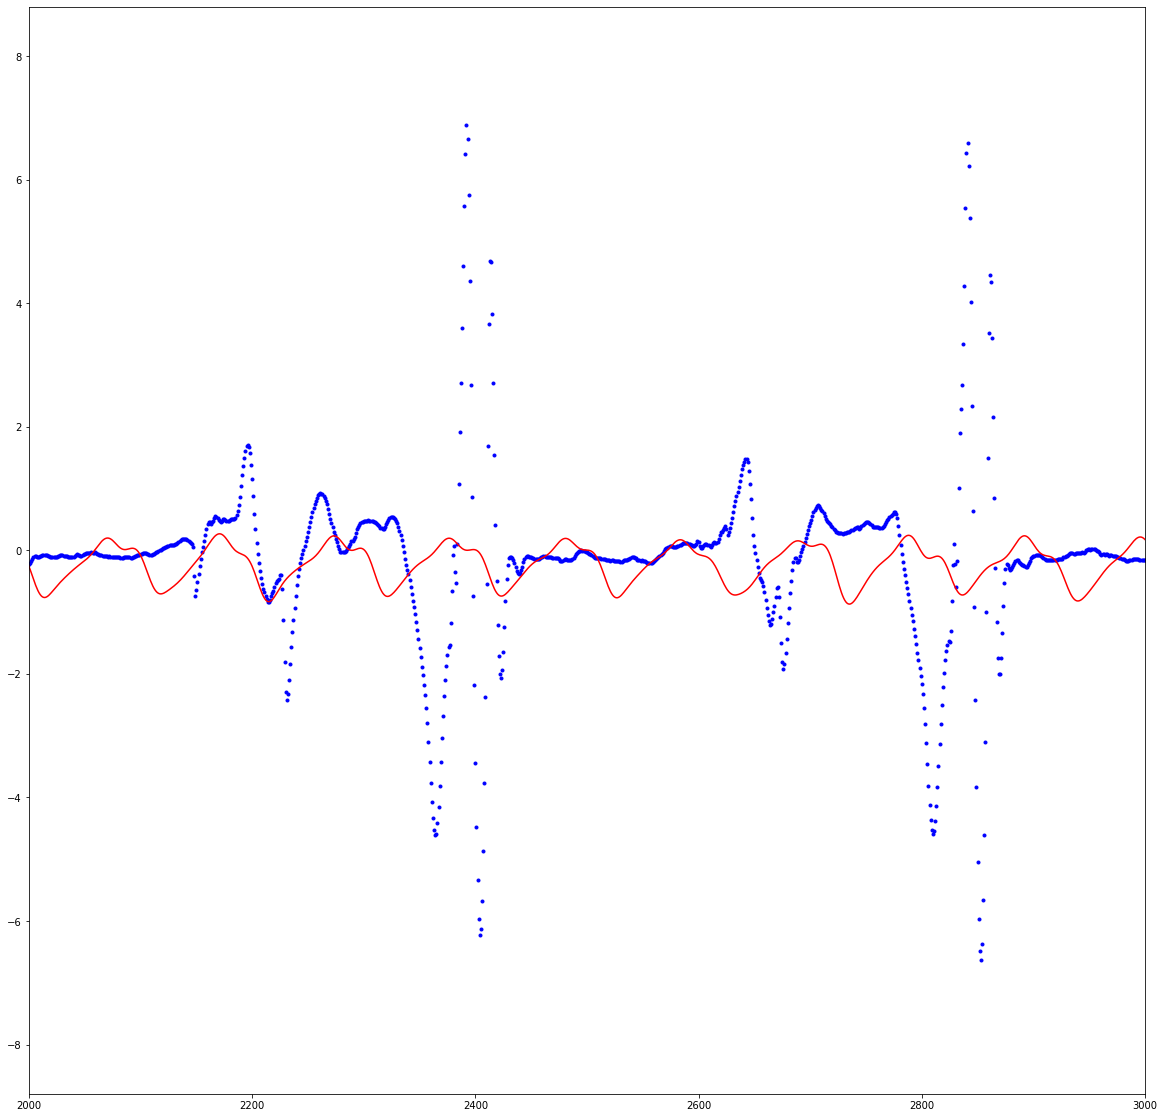

In [71]:
plt.rcParams['figure.figsize'] = 20, 20
plt.plot(walk_s['gFx'], 'b.')
plt.plot(low_passed_k_x, 'r-')
plt.xlim(2000, 3000)
plt.show

In [72]:
filtered_v = pd.DataFrame(
    {'time': walk_v['time'],
     'filtered_x': low_passed_v_x,
     'filtered_y': low_passed_v_y,
     'filtered_z': low_passed_v_z
    })

In [73]:
filtered_s = pd.DataFrame(
    {'time': walk_s['time'],
     'filtered_x': low_passed_s_x,
     'filtered_y': low_passed_s_y,
     'filtered_z': low_passed_s_z
    })

In [74]:
filtered_k = pd.DataFrame(
    {'time': walk_k['time'],
     'filtered_x': low_passed_k_x,
     'filtered_y': low_passed_k_y,
     'filtered_z': low_passed_k_z
    })

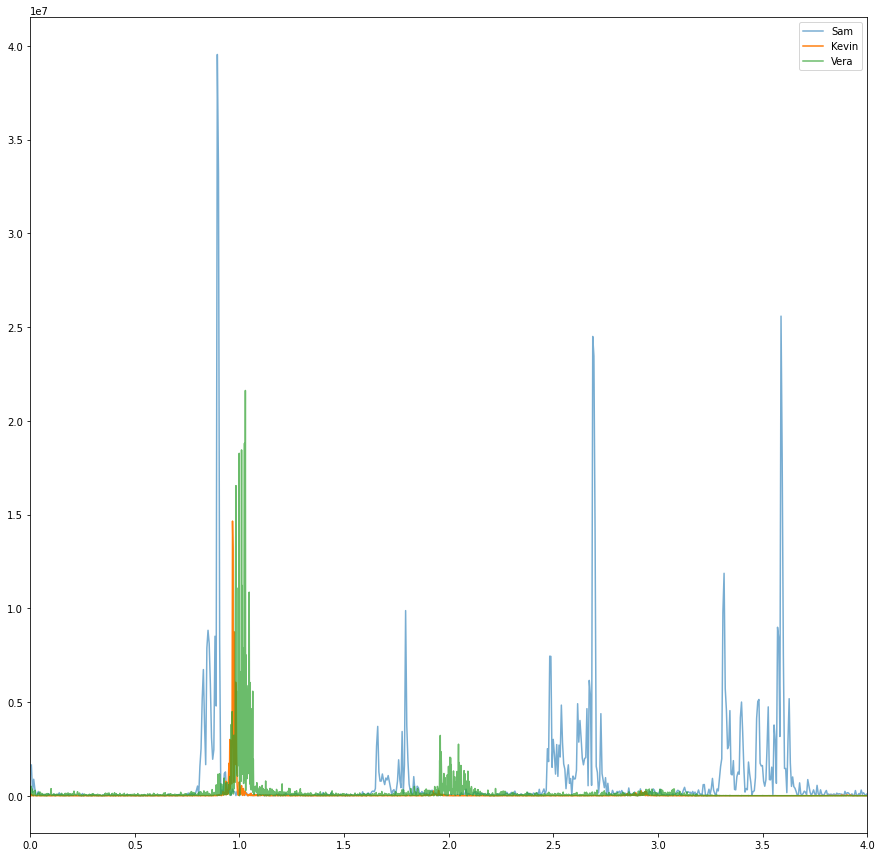

In [75]:
# Fourier on x

freq_vx = np.fft.fftfreq(len(walk_v['gFx']), d = 1/100)
freq_sx = np.fft.fftfreq(len(walk_s['gFx']), d = 1/400)
freq_kx = np.fft.fftfreq(len(walk_k['gFx']), d = 1/100)

filtered_f_vx = np.fft.fft(filtered_v['filtered_x'].values)
filtered_freq_vx = np.fft.fftfreq(len(filtered_v['filtered_x']), d = 1/100)

filtered_f_sx = np.fft.fft(filtered_s['filtered_x'].values)
filtered_freq_sx = np.fft.fftfreq(len(filtered_s['filtered_x']), d = 1/400)

filtered_f_kx = np.fft.fft(filtered_k['filtered_x'].values)
filtered_freq_kx = np.fft.fftfreq(len(filtered_k['filtered_x']), d = 1/100)

i_vx = freq_vx > 0
i_sx = freq_sx > 0
i_kx = freq_kx > 0

plt.rcParams['figure.figsize'] = (15, 15)
plt.plot(filtered_freq_sx[i_sx], abs(filtered_f_sx[i_sx])**2, label = 'Sam', alpha = 0.6)
plt.plot(filtered_freq_kx[i_kx], abs(filtered_f_kx[i_kx])**2, label = 'Kevin')
plt.plot(filtered_freq_vx[i_vx], abs(filtered_f_vx[i_vx])**2, label = 'Vera', alpha = 0.7)
plt.xlim(0, 4)
plt.legend()
plt.show()

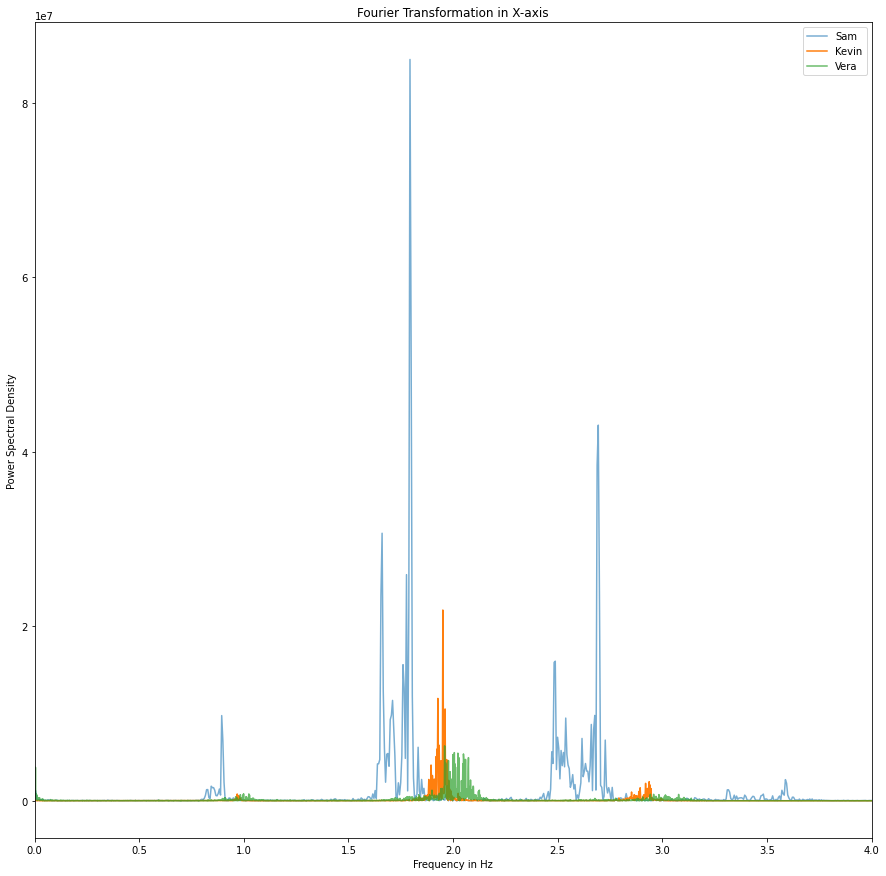

In [76]:
# Fourier on y

freq_vy = np.fft.fftfreq(len(walk_v['gFy']), d = 1/100)
freq_sy = np.fft.fftfreq(len(walk_s['gFy']), d = 1/400)
freq_ky = np.fft.fftfreq(len(walk_k['gFy']), d = 1/100)

filtered_f_vy = np.fft.fft(filtered_v['filtered_y'].values)
filtered_freq_vy = np.fft.fftfreq(len(filtered_v['filtered_y']), d = 1/100)

filtered_f_sy = np.fft.fft(filtered_s['filtered_y'].values)
filtered_freq_sy = np.fft.fftfreq(len(filtered_s['filtered_y']), d = 1/400)

filtered_f_ky = np.fft.fft(filtered_k['filtered_y'].values)
filtered_freq_ky = np.fft.fftfreq(len(filtered_k['filtered_y']), d = 1/100)

i_vy = freq_vy > 0
i_sy = freq_sy > 0
i_ky = freq_ky > 0

plt.rcParams['figure.figsize'] = (15, 15)
plt.plot(filtered_freq_sy[i_sy], abs(filtered_f_sy[i_sy])**2, label = 'Sam', alpha = 0.6)
plt.plot(filtered_freq_ky[i_ky], abs(filtered_f_ky[i_ky])**2, label = 'Kevin')
plt.plot(filtered_freq_vy[i_vy], abs(filtered_f_vy[i_vy])**2, label = 'Vera', alpha = 0.7)
plt.xlim(0, 4)
plt.title('Fourier Transformation in X-axis')
plt.xlabel("Frequency in Hz")
plt.ylabel("Power Spectral Density")
plt.legend()
plt.show()

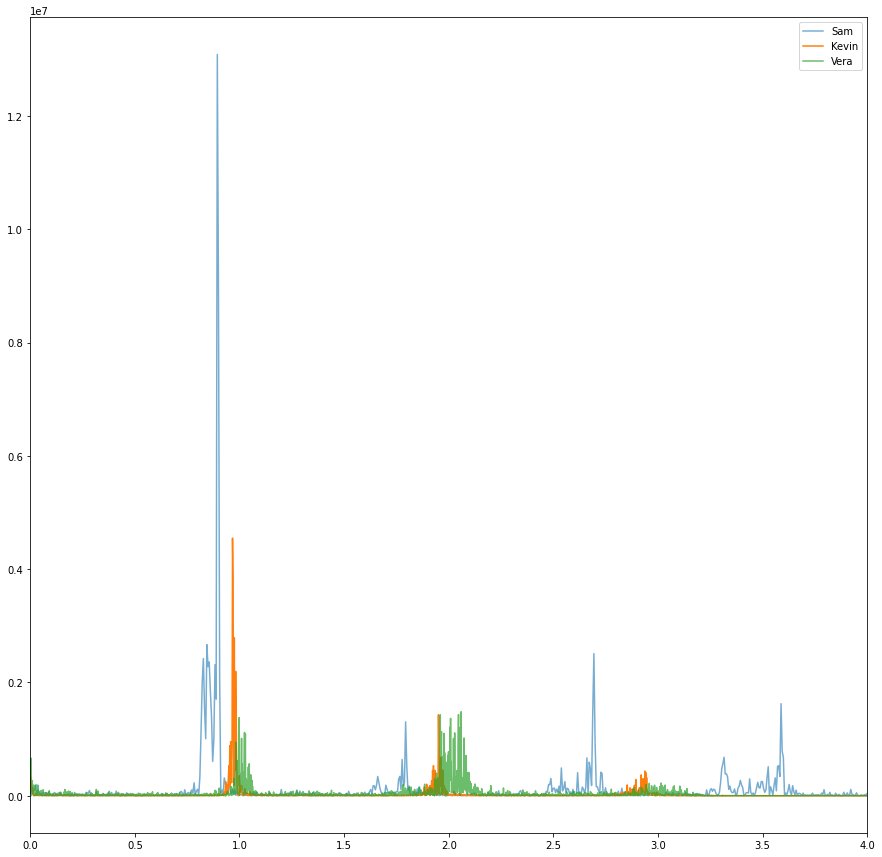

In [77]:
# Fourier on z

freq_vz = np.fft.fftfreq(len(walk_v['gFz']), d = 1/100)
freq_sz = np.fft.fftfreq(len(walk_s['gFz']), d = 1/400)
freq_kz = np.fft.fftfreq(len(walk_k['gFz']), d = 1/100)

filtered_f_vz = np.fft.fft(filtered_v['filtered_z'].values)
filtered_freq_vz = np.fft.fftfreq(len(filtered_v['filtered_z']), d = 1/100)

filtered_f_sz = np.fft.fft(filtered_s['filtered_z'].values)
filtered_freq_sz = np.fft.fftfreq(len(filtered_s['filtered_z']), d = 1/400)

filtered_f_kz = np.fft.fft(filtered_k['filtered_z'].values)
filtered_freq_kz = np.fft.fftfreq(len(filtered_k['filtered_z']), d = 1/100)

i_vz = freq_vz > 0
i_sz = freq_sz > 0
i_kz = freq_kz > 0

plt.rcParams['figure.figsize'] = (15, 15)
plt.plot(filtered_freq_sz[i_sz], abs(filtered_f_sz[i_sz])**2, label = 'Sam', alpha = 0.6)
plt.plot(filtered_freq_kz[i_kz], abs(filtered_f_kz[i_kz])**2, label = 'Kevin')
plt.plot(filtered_freq_vz[i_vz], abs(filtered_f_vz[i_vz])**2, label = 'Vera', alpha = 0.7)
plt.xlim(0, 4)
plt.legend()
plt.show()

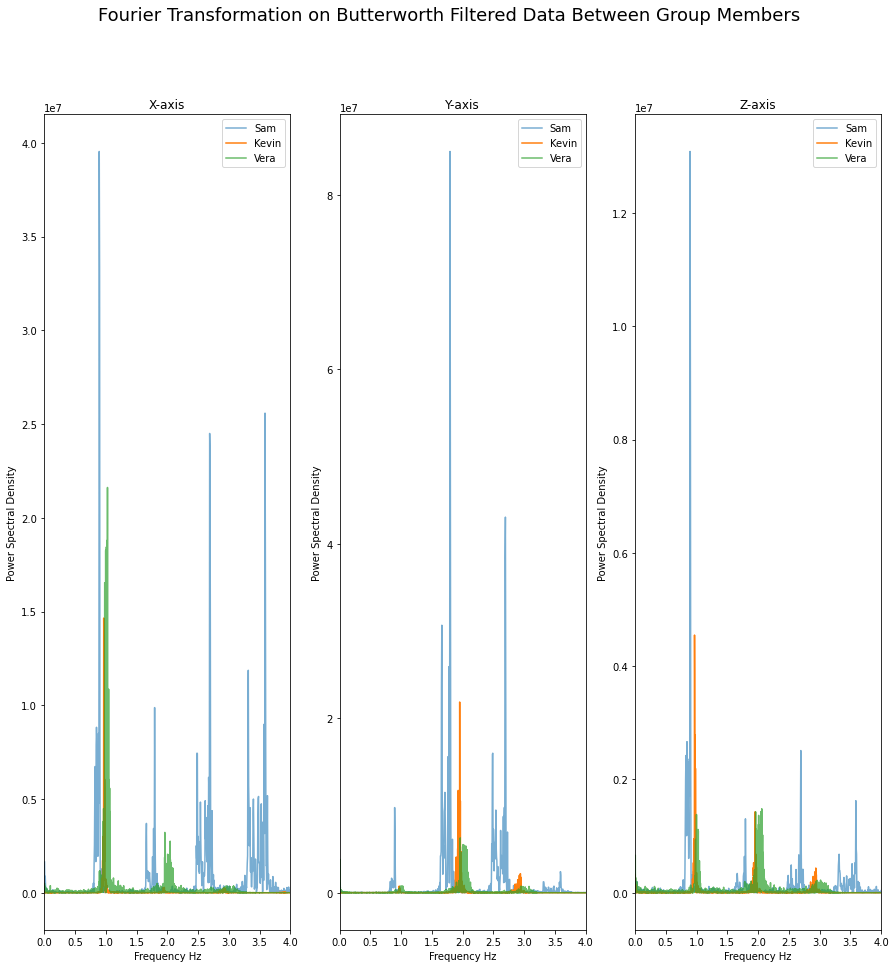

In [78]:
fig, axes = plt.subplots(ncols = 3)

fig.suptitle('Fourier Transformation on Butterworth Filtered Data Between Group Members', fontsize = 18)

axes[0].plot(filtered_freq_sx[i_sx], abs(filtered_f_sx[i_sx])**2, label = 'Sam', alpha = 0.6)
axes[0].plot(filtered_freq_kx[i_kx], abs(filtered_f_kx[i_kx])**2, label = 'Kevin')
axes[0].plot(filtered_freq_vx[i_vx], abs(filtered_f_vx[i_vx])**2, label = 'Vera', alpha = 0.7)
axes[0].set_xlim(0, 4)
axes[0].set_title('X-axis')
axes[0].legend()

axes[1].plot(filtered_freq_sy[i_sy], abs(filtered_f_sy[i_sy])**2, label = 'Sam', alpha = 0.6)
axes[1].plot(filtered_freq_ky[i_ky], abs(filtered_f_ky[i_ky])**2, label = 'Kevin')
axes[1].plot(filtered_freq_vy[i_vy], abs(filtered_f_vy[i_vy])**2, label = 'Vera', alpha = 0.7)
axes[1].set_xlim(0, 4)
axes[1].set_title('Y-axis')
axes[1].legend()

axes[2].plot(filtered_freq_sz[i_sz], abs(filtered_f_sz[i_sz])**2, label = 'Sam', alpha = 0.6)
axes[2].plot(filtered_freq_kz[i_kz], abs(filtered_f_kz[i_kz])**2, label = 'Kevin')
axes[2].plot(filtered_freq_vz[i_vz], abs(filtered_f_vz[i_vz])**2, label = 'Vera', alpha = 0.7)
axes[2].set_xlim(0, 4)
axes[2].set_title('Z-axis')
axes[2].legend()


for ax in axes.flat:
    ax.set(xlabel='Frequency Hz', ylabel='Power Spectral Density')
    

In [79]:
import scipy.integrate as it

In [80]:
filtered_v_positive = filtered_v
filtered_v_positive['filtered_x_981'] = filtered_v_positive['filtered_x'] * 9.81
filtered_v_positive = filtered_v_positive[filtered_v_positive['filtered_x_981'] > 0].reset_index()
filtered_v_positive = filtered_v_positive.drop(columns=['index'])

In [81]:
filtered_v_positive

,time,filtered_x,filtered_y,filtered_z,filtered_x_981
0,2020-08-03 21:13:32.6220,0.058689,-0.981566,-0.106046,0.575735
1,2020-08-03 21:13:32.6310,0.056988,-0.981390,-0.106010,0.559056
2,2020-08-03 21:13:32.6400,0.055420,-0.981179,-0.106233,0.543670
3,2020-08-03 21:13:32.6500,0.054047,-0.980957,-0.106731,0.530201
4,2020-08-03 21:13:32.6610,0.052937,-0.980749,-0.107510,0.519310
...,...,...,...,...,...
46031,2020-08-03 21:25:22.5120,0.109383,-0.992831,-0.006650,1.073043
46032,2020-08-03 21:25:22.5220,0.109677,-0.992914,-0.007198,1.075936
46033,2020-08-03 21:25:22.5320,0.109961,-0.992997,-0.007703,1.078715
46034,2020-08-03 21:25:22.5420,0.110227,-0.993079,-0.008161,1.081329


In [82]:
count = 0
x_acceleration = filtered_v_positive['filtered_x_981'].values
vel = [0]
time = 0.01

vel_all = vel[-1] + x_acceleration * time

In [83]:
vel_df = pd.DataFrame(data = vel_all, columns=['velocity']) 

In [84]:
vel_df

,velocity
0,0.005757
1,0.005591
2,0.005437
3,0.005302
4,0.005193
...,...
46031,0.010730
46032,0.010759
46033,0.010787
46034,0.010813


In [85]:
filtered_matrix = filtered_v[['filtered_x', 'filtered_y', 'filtered_z']].corr()
filtered_matrix

,filtered_x,filtered_y,filtered_z
filtered_x,1.000000,-0.023575,0.526871
filtered_y,-0.023575,1.000000,-0.563461
filtered_z,0.526871,-0.563461,1.000000


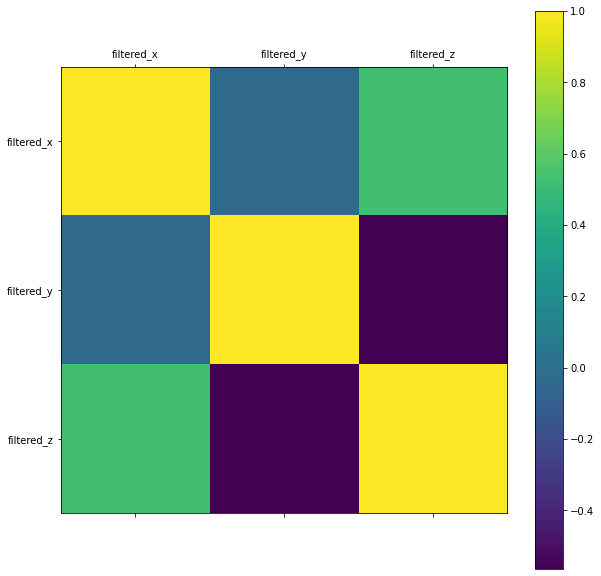

In [86]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.matshow(filtered_matrix)
plt.xticks(range(filtered_v.shape[1]-2), ('filtered_x', 'filtered_y', 'filtered_z'))
plt.yticks(range(filtered_v.shape[1]-2), ('filtered_x', 'filtered_y', 'filtered_z'))
plt.colorbar()
plt.show()

In [87]:
print(stats.mannwhitneyu(filtered_v['filtered_x'], filtered_k['filtered_x']).pvalue)
print(stats.mannwhitneyu(filtered_v['filtered_y'], filtered_k['filtered_y']).pvalue)
print(stats.mannwhitneyu(filtered_v['filtered_z'], filtered_k['filtered_z']).pvalue)

0.0
0.0
0.0


In [88]:
print(stats.mannwhitneyu(filtered_v['filtered_x'], filtered_s['filtered_x']).pvalue)
print(stats.mannwhitneyu(filtered_v['filtered_y'], filtered_s['filtered_y']).pvalue)
print(stats.mannwhitneyu(filtered_v['filtered_z'], filtered_s['filtered_z']).pvalue)

0.0
0.0
0.0


In [89]:
print(stats.mannwhitneyu(filtered_k['filtered_x'], filtered_s['filtered_x']).pvalue)
print(stats.mannwhitneyu(filtered_k['filtered_y'], filtered_s['filtered_y']).pvalue)
print(stats.mannwhitneyu(filtered_k['filtered_z'], filtered_s['filtered_z']).pvalue)

0.0
1.413085036032408e-222
5.0555226459633944e-191
